In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Импорт данных

In [3]:
df = pd.read_csv('../data/preprocessed_ipp_factors.csv')

df.index = pd.to_datetime(df.date)

df.drop(['Unnamed: 0', 'date'], axis=1, inplace=True)

In [4]:
df.head(1)

,goal,news,consumer_price,cb_monitor,bussines_clim,curs,rzd,interest_rate
date,,,,,,,,
2015-01-31,101.3,-1.551464,1049.05,-20.468123,-8.734671,65.153087,96.6,15.380952


# обучение модели

In [6]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/pycups-2.0.1-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/PyPDF3-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.7 MB/s eta 0:00:00
  

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [117]:
len(df.columns)

8

In [126]:
# Используем только столбец с ИПП
Y_train = df[:"2022-06-30"]['goal'].values.reshape(-1, 1)
X_train = df[:"2022-06-30"].drop('goal', axis=1)

Y_test = df["2022-06-30":]['goal'].values.reshape(-1, 1)
X_test = df["2022-06-30":].drop('goal', axis=1)

# Нормализация данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X_train)
scaled_ipp = scaler.fit_transform(Y_train)


# Создание генератора временных рядов scaled_ipp_data, length=lookback, batch_size=32
generator = TimeseriesGenerator(data=scaled_data, targets=scaled_ipp, length=6)

In [128]:
model = Sequential()

model.add(GRU(50, activation='tanh', input_shape=(lookback, 1)))
model.add(Dense(3)) 
model.compile(optimizer='adam', loss='mape')

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                    │ (None, 50)             │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,103 (31.65 KB)

 Trainable params: 8,103 (31.65 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model.fit(generator, epochs=100, verbose=1)

Epoch 1/100


ValueError: Exception encountered when calling GRUCell.call().

[1mDimensions must be equal, but are 7 and 1 for '{{node sequential_22_1/gru_14_1/gru_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_22_1/gru_14_1/strided_slice_2, sequential_22_1/gru_14_1/gru_cell_1/Cast/ReadVariableOp)' with input shapes: [?,7], [1,150].[0m

Arguments received by GRUCell.call():
  • inputs=tf.Tensor(shape=(None, 7), dtype=float32)
  • states=('tf.Tensor(shape=(None, 50), dtype=float32)',)
  • training=True

In [135]:
train_test_split(X, y, test_size=0.2, shuffle=False)[3]

array([[0.29126214, 0.31067961, 0.31553398],
       [0.31067961, 0.31553398, 0.40291262],
       [0.31553398, 0.40291262, 0.41747573],
       [0.40291262, 0.41747573, 0.27669903],
       [0.41747573, 0.27669903, 0.30097087],
       [0.27669903, 0.30097087, 0.36407767],
       [0.30097087, 0.36407767, 0.26699029],
       [0.36407767, 0.26699029, 0.23300971],
       [0.26699029, 0.23300971, 0.27669903],
       [0.23300971, 0.27669903, 0.40776699],
       [0.27669903, 0.40776699, 0.61165049],
       [0.40776699, 0.61165049, 0.68932039],
       [0.61165049, 0.68932039, 0.65048544],
       [0.68932039, 0.65048544, 0.61650485],
       [0.65048544, 0.61650485, 0.64563107],
       [0.61650485, 0.64563107, 0.65048544],
       [0.64563107, 0.65048544, 0.63106796],
       [0.65048544, 0.63106796, 0.59223301],
       [0.63106796, 0.59223301, 0.50485437]])

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Загрузка датасета
data = df 

# Нормализация данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Создание обучающих и тестовых выборок
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 2):
        X.append(data[i:(i + seq_length), 1:])  # признаки
        y.append(data[(i + seq_length):(i + seq_length + 3), 0])  # ИПП на 3 месяца вперед
    return np.array(X), np.array(y)

SEQ_LENGTH = 12  # используем последние 12 месяцев для прогноза
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Деление на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Создание модели GRU
model = Sequential([
    GRU(100, activation='relu', input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dense(3)  # прогноз на 3 месяца вперед
])

model.compile(optimizer='adam', loss='mse')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Прогноз
def make_prediction(model, input_data, seq_length):
    predictions = []
    current_input = input_data[-seq_length:]
    for _ in range(3):  # делаем прогноз на 3 месяца вперед
        pred = model.predict(current_input[np.newaxis, :, :])
        predictions.append(pred.flatten())
        current_input = np.append(current_input[1:], pred, axis=0)
    return np.array(predictions).flatten()

last_sequence = scaled_data[-SEQ_LENGTH:, 1:]
predictions = make_prediction(model, last_sequence, SEQ_LENGTH)

# Преобразование прогноза обратно к исходному масштабу
predicted_IPP = scaler.inverse_transform(
    np.concatenate([predictions.reshape(-1, 1), np.zeros((predictions.shape[0], scaled_data.shape[1] - 1))], axis=1)
)[:, 0]

print(predicted_IPP)


Epoch 1/50


/home/misha/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - loss: 0.2896 - val_loss: 0.1320
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2163 - val_loss: 0.0660
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1419 - val_loss: 0.0298
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0812 - val_loss: 0.0262
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0393 - val_loss: 0.0559
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0291 - val_loss: 0.0994
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0320 - val_loss: 0.1112
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0314 - val_loss: 0.0956
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0282 - val_loss: 0.0723
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0263 - val_loss: 0.0548
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0244 - val_loss: 0.0452
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0230 - val_loss: 0.0413
Epoch 13/50

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 7 and the array at index 1 has size 3

In [95]:
train[-3:]

array([[98.3],
       [98.7],
       [98.8]])

In [97]:
scaler.inverse_transform(model.predict((train[-3:].reshape((1, 3, 1)))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[385.6189 , 210.40886, 249.56937]], dtype=float32)

In [73]:
def predict_future(model, data, lookback):
    # Начальное состояние для предсказания
    current_step = data[-lookback:].reshape((1, lookback, 1))
    
    # Предсказываем на 3 месяца вперед
    predictions = []
    for _ in range(3):
        pred = model.predict(current_step)
        predictions.append(pred[0, 0])  # Берем только первое значение из предсказания
        current_step = np.roll(current_step, -1)  # Сдвигаем окно на один шаг
        current_step[0, -1, 0] = pred[0, 0]  # Последнее значение окна заменяем предсказанием
    
    return predictions

# Пример использования:
future_predictions = predict_future(model, scaled_ipp_data, lookback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [76]:
scaler.inverse_transform([future_predictions])

array([[92.18978824, 92.24033906, 92.29507604]])

In [77]:
from sklearn.metrics import r2_score
import numpy as np

# Функция для вычисления MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Обучающая выборка
train_predictions = model.predict(train_generator)
train_true_values = train_data[lookback:]

r2_train = r2_score(train_true_values, train_predictions)
mape_train = mean_absolute_percentage_error(train_true_values, train_predictions)

print("Train R^2:", r2_train)
print("Train MAPE:", mape_train)

# Тестовая выборка
test_predictions = model.predict(test_generator)
test_true_values = test_data[lookback:]

r2_test = r2_score(test_true_values, test_predictions)
mape_test = mean_absolute_percentage_error(test_true_values, test_predictions)

print("Test R^2:", r2_test)
print("Test MAPE:", mape_test)


NameError: name 'train_generator' is not defined

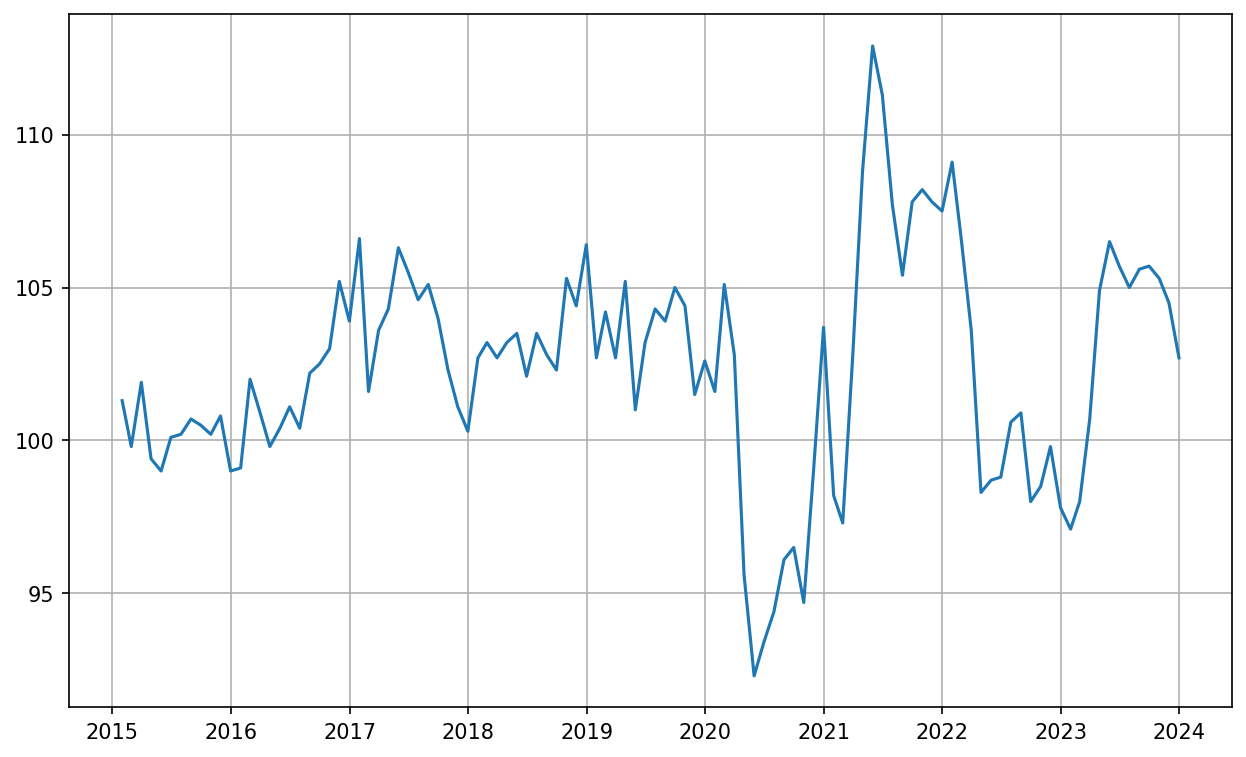

In [87]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

ax.plot(df.index, df.goal)
ax.grid()